#  Sentiment Analysis with Logistic Regression

This project performs sentiment analysis on Amazon Alexa reviews using a Logistic Regression model. The dataset is loaded from a TSV file, and the text is preprocessed using spaCy for tokenization and lemmatization.


In [18]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
df_amazon = pd.read_csv ("amazon_alexa.tsv", sep="\t", encoding='utf-8')

In [ ]:
df_amazon

In [ ]:
df_amazon.shape

In [ ]:
df_amazon.info()

In [ ]:
df_amazon.feedback.value_counts()

In [19]:
import string 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation
# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()


In [ ]:
# # Creating our tokenizer function
# def spacy_tokenizer(sentence):
#     # Creating our token object, which is used to create documents with linguistic annotations.
#     mytokens = parser(sentence)

#     # Lemmatizing each token and converting each token into lowercase
#     mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

#     # Removing stop words
#     mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

#     # return preprocessed list of tokens
#     return mytokens

In [ ]:

# class predictors(TransformerMixin):
#     def transform(self, X, **transform_params):
#         # Cleaning Text
#         cleaned_text = [clean_text(text) for text in X]
#         print(cleaned_text)  # Add this line for debugging
#         return cleaned_text

#     def fit(self, X, y=None, **fit_params):
#         return self

# def clean_text(text):
#     if isinstance(text, str):
#         return text.strip().lower()
#     else:
#         return "we dont have a message "

In [ ]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer,  ngram_range=(1,1))
# from sklearn.feature_extraction.text import CountVectorizer

# # Assuming X_train is your training data
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)

# # Now the vectorizer is fitted, and you can access the feature names
# print(vectorizer.get_feature_names_out)

In [ ]:
# tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
# from sklearn.model_selection import train_test_split

# X = df_amazon['verified_reviews'] # the features we want to analyze
# ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

# X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
# print(X_train.head())


In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

# # Create pipeline using Bag of Words
# pipe = Pipeline([("cleaner", predictors()),
#                  ('vectorizer', bow_vector),
#                  ('classifier', classifier)])

# # model generation
# pipe.fit(X_train,y_train)

In [ ]:
# from sklearn import metrics
# # Predicting with a test dataset
# predicted = pipe.predict(X_test)

# # Model Accuracy
# print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
# print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

In [20]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import string 
import spacy

In [21]:

# Load English tokenizer, tagger, parser, NER, and word vectors
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS


In [22]:

# Load the small English NLP model
nlp = spacy.load('en_core_web_sm')


In [23]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in STOP_WORDS and word not in string.punctuation]
    return mytokens


In [25]:

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        cleaned_text = [clean_text(text) for text in X]
        print(cleaned_text)  # Add this line for debugging
        return cleaned_text

    def fit(self, X, y=None, **fit_params):
        return self

In [26]:
def clean_text(text):
    if isinstance(text, str):
        return text.strip().lower()
    else:
        return "we don't have a message"


In [27]:
df_amazon = pd.read_csv("amazon_alexa.tsv", sep="\t", encoding='utf-8')


In [28]:

# Split the data
X = df_amazon['verified_reviews']
ylabels = df_amazon['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)


In [29]:

# Create the pipeline
bow_vector = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1, 1))
classifier = LogisticRegression()
pipe = Pipeline([("cleaner", predictors()), ('vectorizer', bow_vector), ('classifier', classifier)])

In [30]:


# Fit the model
pipe.fit(X_train, y_train)

['used twice not working!!!!!!!', 'looked brand new works great. i love these echo dots and the refurbished ones are like new', 'i’m having trouble connecting my tv to it, but i’m not exactly tech smart. i’m sure one of my grandsons will figure it out for me. so far i’ve been using it mostly for music.', 'very cool product. speaker sounds good with my spotify blasting through it.', 'the echo spot is great!', '', 'awesome thing, love alexa', 'i like echo spot. i bought it to use as an alarm clock. one negative that i didnt really think about, when you wake up in the morning and are somewhat groggy, its hard to tell alexa to turn off the alarm, or hard to remember commands to snooze for a few minutes. in this case a clock with buttons seems to work better', 'didn’t really work as smooth as they make it seem like.', 'perfect condition!', 'having so much fun with alexa. love being able to listen to music when i’m across the room or busy doing something else.', 'worked like new.  will do it

/home/bilel/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f10513a7d00>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f1050d4e8b0>)),
                ('classifier', LogisticRegression())])

In [31]:

# Predict with the test dataset
predicted = pipe.predict(X_test)


['awesome piece of technology that has simplified my life. great purchase.', 'love my echo great sound very smart!', 'use the product for music and it’s great!', 'it works great!!', 'great sound and easy to set up. purchased the echo plus because it had a built in hub and would make it easier to connect to devices. i am hooked on alexa!', "love it.  it works great.  alexa still has some problems  but it is getting better every day.  i'm not an expert but i think the sound quality is fine.  not perfect but good.", 'it is a good addition to my small space, and it keeps me up to date on events and weather conditions.', 'mainly use it for the music but i’m learning more all the time.  really nothing bad to say about it', 'disconnects often', 'just got my third one. love them', "i love this thing. i talk to it through walls and in other rooms. i have been an amazon lover for a while so i have amazon music unlimited, kindle unlimited, prime video, etc., so i was ready for this when it came o

In [32]:


# Model Accuracy
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:", metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:", metrics.recall_score(y_test, predicted))


Logistic Regression Accuracy: 0.9354497354497354
Logistic Regression Precision: 0.941240478781284
Logistic Regression Recall: 0.9919724770642202


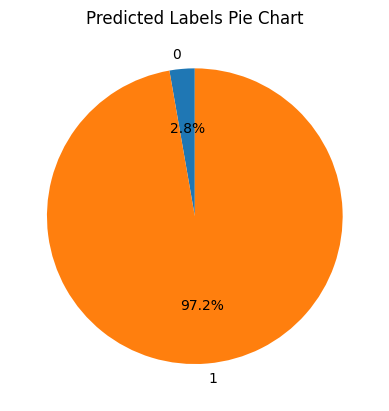

In [34]:
import matplotlib.pyplot as plt
import numpy as np
unique_labels, label_counts = np.unique(predicted, return_counts=True)

# Plotting a pie chart
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Labels Pie Chart')
plt.show()